In [1]:
import cv2
import numpy as np
import torch
from torch.autograd import Variable
from torchvision import models
from models import *

from matplotlib import pyplot as plt
import matplotlib
matplotlib.rcParams['text.usetex'] = True

import csv
import math
plt.style.use(['science'])

In [2]:
def preprocess_image(cv2im, resize_im=True):
    """
        Processes image for CNNs

    Args:
        PIL_img (PIL_img): Image to process
        resize_im (bool): Resize to 224 or not
    returns:
        im_as_var (Pytorch variable): Variable that contains processed float tensor
    """
    # mean and std list for channels (Imagenet)
    mean = [0.4914, 0.4822, 0.4465]
    std = [0.2023, 0.1994, 0.2010]
    # Resize image
    if resize_im:
        cv2im = cv2.resize(cv2im, (32,32))
    im_as_arr = np.float32(cv2im)
    im_as_arr = np.ascontiguousarray(im_as_arr[..., ::-1])
    im_as_arr = im_as_arr.transpose(2, 0, 1)  # Convert array to D,W,H
    # Normalize the channels
    for channel, _ in enumerate(im_as_arr):
        im_as_arr[channel] /= 255
        im_as_arr[channel] -= mean[channel]
        im_as_arr[channel] /= std[channel]
    # Convert to float tensor
    im_as_ten = torch.from_numpy(im_as_arr).float()
    # Add one more channel to the beginning. Tensor shape = 1,3,32,32
    im_as_ten.unsqueeze_(0)
    # Convert to Pytorch variable
    im_as_var = Variable(im_as_ten, requires_grad=True)
    return im_as_var

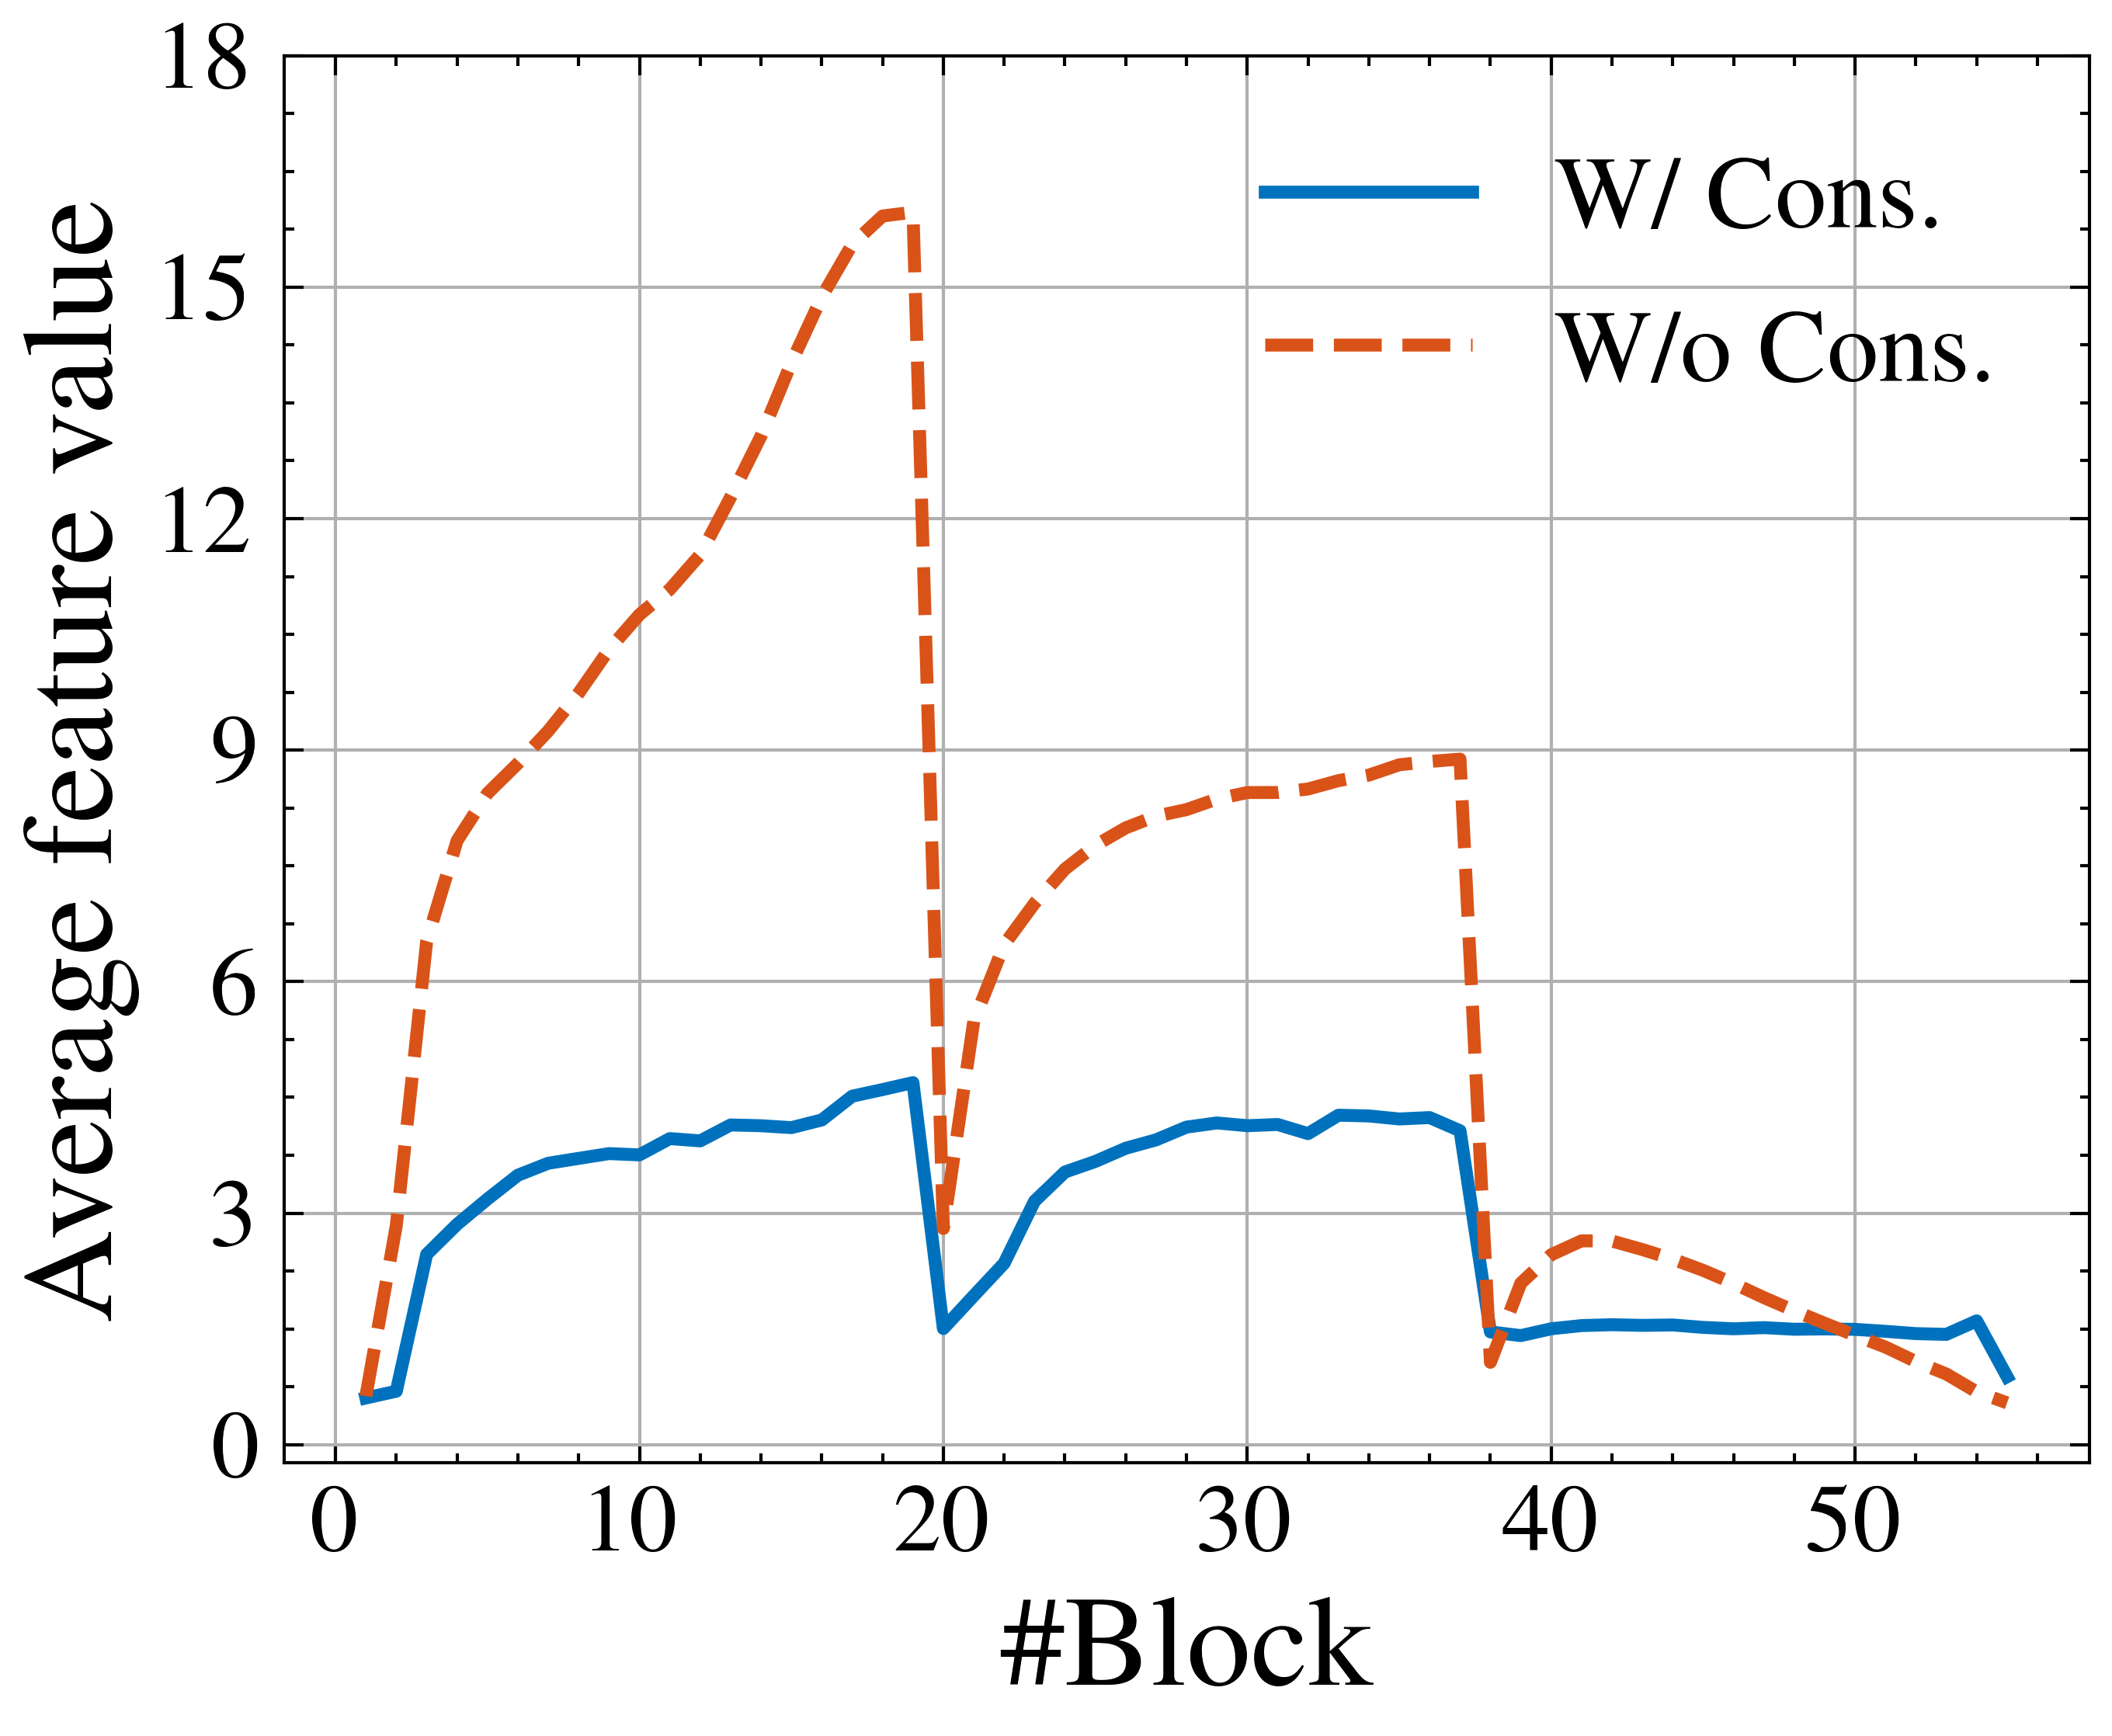

In [5]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

# model = ab2resnet20_f(1,-3.0,4.0).cuda()
# model.to(device)
# model.load_state_dict(torch.load('/media4/507/MovedFromHome/507/qc/dl_AB_struc/output/ab2r20_f_b1_-3.0_b2_4.0_2022-12-13.pth').module.state_dict())

# model = ab2resnet20_f(1,3.0,4.0).cuda()
# model.to(device)
# model.load_state_dict(torch.load('/media4/507/MovedFromHome/507/qc/dl_AB_struc/output/ab2r20_f_b1_3.0_b2_4.0_2022-12-14.pth').module.state_dict())

# model = ab2resnet110_f(1,-3.0,4.0).cuda()
# model.to(device)
# model.load_state_dict(torch.load('/media4/507/MovedFromHome/507/qc/dl_AB_struc/output/ab2r110_f_b1_-3.0_b2_4.0_2022-12-14.pth').module.state_dict())

# model = ab2resnet110_f(1,3.0,4.0).cuda()
# model.to(device)
# model.load_state_dict(torch.load('/media4/507/MovedFromHome/507/qc/dl_AB_struc/output/ab2r110_f_b1_3.0_b2_4.0_2022-12-15.pth').module.state_dict())

model_2yes = ab2resnet110_f1(1,-3.0,4.0).cuda()
model_2yes.to(device)
model_2yes.load_state_dict(torch.load('/media4/507/MovedFromHome/507/qc/dl_AB_struc/output/ab2r110_f1_h_1.0_b1_-3.0_b2_4.0_2022-12-17.pth').module.state_dict())

model_2no = ab2resnet110_f1(1,3.0,4.0).cuda()
model_2no.to(device)
model_2no.load_state_dict(torch.load('/media4/507/MovedFromHome/507/qc/dl_AB_struc/output/ab2r110_f1_h_1.0_b1_3.0_b2_4.0_2022-12-25.pth').module.state_dict())

model_3yes = ab3resnet110_f1(1,4.0,-2.0,-1.0).cuda()
model_3yes.to(device)
model_3yes.load_state_dict(torch.load('/media4/507/MovedFromHome/507/qc/dl_AB_struc/output/ab3r110_f1_h_1.0_b1_4.0_b2_-2.0_2022-12-25.pth').module.state_dict())

model_3no = ab3resnet110_f1(1,4.0,2.0,1.0).cuda()
model_3no.to(device)
model_3no.load_state_dict(torch.load('/media4/507/MovedFromHome/507/qc/dl_AB_struc/output/ab3r110_f1_h_1.0_b1_4.0_b2_2.0_b3_1.0_0.pth').module.state_dict())

# model = ab3resnet20_f(1,4.0,2.0,1.0).cuda()
# model.to(device)
# model.load_state_dict(torch.load('/media4/507/MovedFromHome/507/qc/dl_AB_struc/output/ab3r20_f_h_1.0_b1_4.0_b2_2.0_b3_1.0_2022-12-16.pth').module.state_dict())


# model = ab3resnet110_f(1,4.0,-2.0,-1.0).cuda()
# model.to(device)
# model.load_state_dict(torch.load('/media4/507/MovedFromHome/507/qc/dl_AB_struc/output/ab3r110_f_h_1.0_b1_4.0_b2_-2.0_b3_-1.0_2022-12-15.pth').module.state_dict())

# model = ab3resnet110_f(1,4.0,2.0,1.0).cuda()
# model.to(device)
# model.load_state_dict(torch.load('/media4/507/MovedFromHome/507/qc/dl_AB_struc/output/ab3r110_f_h_1.0_b1_4.0_b2_2.0_b3_1.0_2022-12-16.pth').module.state_dict())


# img=cv2.imread('feature_map/bird5.png')
img=cv2.imread('feature_map/cat1.png')
img_edited=preprocess_image(img)
input=img_edited.cuda()

tmp1=model_2yes(input)
tmp2=model_2no(input)
tmp3=model_3yes(input)
tmp4=model_3no(input)

output_2yes =  model_2yes.result
output_2no =  model_2no.result
output_3yes =  model_3yes.result
output_3no =  model_3no.result
# len(output_2yes)

y_2yes=[]
for i in output_2yes:
    y_2yes.append(i.mean().item())
y_2yes=np.array(y_2yes)

y_2no=[]
for j in output_2no:
    y_2no.append(j.mean().item())
y_2no=np.array(y_2no)

y_3yes=[]
for i in output_3yes:
    y_3yes.append(i.mean().item())
y_3yes=np.array(y_3yes)

y_3no=[]
for j in output_3no:
    y_3no.append(j.mean().item())
y_3no=np.array(y_3no)


# f1,r110,ab2
x_2 = [i for i in range(1, 56)]
x_2=np.array(x_2)
# # f1,r110,ab3
x_3 = [i for i in range(1, 54)]
x_3=np.array(x_3)



from matplotlib import pyplot as plt
import matplotlib
matplotlib.rcParams['text.usetex'] = True
import numpy as np
import csv
import math
from mpl_toolkits.axes_grid1.inset_locator import mark_inset
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
plt.style.use(['science','ieee'])

##################################2-step####################################################

font1 = {
'size'   : 20,
}

font2 = {
'size'   : 16,
}
fig, ax = plt.subplots(1, 1, figsize=(5, 4))

ax.plot(x_2,y_2yes,label='W/ Cons.',c='#0072bd',lw=2)
ax.plot(x_2,y_2no,label='W/o Cons.',c='#d95319',lw=2)


plt.xlabel(r'\#Block',font1) 
plt.ylabel('Average feature value',font1)

plt.yticks([0,3,6,9,12,15,18])
# plt.ylim(0, 18)
plt.tick_params(labelsize=15)

# plt.legend(prop=font2,ncol=2,bbox_to_anchor=(0.869,0.23))
plt.legend(prop=font2)

plt.grid()
plt.savefig('feature_map/feature-2.pdf')

plt.show()

##################################2-step####################################################

##################################3-step####################################################
# font1 = {
# 'size'   : 20,
# }

# font2 = {
# 'size'   : 16,
# }
# fig, ax = plt.subplots(1, 1, figsize=(5, 4))

# ax.plot(x_3,y_3yes,label='W/ Cons.',c='#0072bd',lw=2)
# ax.plot(x_3,y_3no,label='W/o Cons.',c='#d95319',lw=2)


# plt.xlabel(r'\#Block',font1) 
# plt.ylabel('Average feature value',font1)


# plt.tick_params(labelsize=15)

# # plt.legend(prop=font2,ncol=2,bbox_to_anchor=(0.869,0.23))
# plt.legend(prop=font2)

# plt.grid()
# plt.savefig('feature_map/feature-3.pdf')

# plt.show()
##################################3-step####################################################
    


